In [1]:
# Kütüphanelerin dahil edilmesi

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
data = pd.read_csv("data_with_nans.csv")
# veri setini dahil etme

##### Data seti inceleme ve temizleme

In [3]:
print(data.columns) # "feature"ları listeleme
data.head()

Index(['Unnamed: 0', 'Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
       'PetalWidthCm', 'Species'],
      dtype='object')


,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,4,5.0,3.4,1.5,0.2,Iris-setosa


In [4]:
data = data.drop(data.columns[0],axis=1) ## unnamed : 0 adlı kolonu silme

In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,170.000000,167.000000,169.000000,166.000000,168.000000
mean,84.500000,5.826347,3.072781,3.707229,1.180357
std,49.218899,0.827189,0.447578,1.789382,0.765049
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,42.250000,5.100000,2.800000,1.500000,0.300000
50%,84.500000,5.800000,3.000000,4.300000,1.300000
75%,126.750000,6.400000,3.400000,5.100000,1.800000
max,169.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
data_smote = data ## ileride aşırı örnekleme süreci (smote) ile veri sentetik veri oluşturarak veri artırımı yapacağız o yüzden yedek data oluşturuyorum.

In [7]:
data.groupby("Species").agg(["min","max","std","mean"]) ## her tür için özelliklerin açıklamalı verileri

Id                        SepalLengthCm                 \
                 min  max        std   mean           min  max       std   
Species                                                                    
Iris-setosa        0   59  17.464249   29.5           4.3  6.9  0.429014   
Iris-versicolor   60  113  15.732133   86.5           4.9  7.0  0.516189   
Iris-virginica   114  169  16.309506  141.5           4.9  7.9  0.650025   

                          SepalWidthCm                          PetalLengthCm  \
                     mean          min  max       std      mean           min   
Species                                                                         
Iris-setosa      5.034483          2.3  4.4  0.390709  3.389831           1.0   
Iris-versicolor  5.932075          2.0  4.4  0.382355  2.805556           1.5   
Iris-virginica   6.546429          2.2  3.9  0.355203  2.996429           1.3   

                                         PetalWidthCm                           
                 max       std      mean          min  max       std      mean  
Species                                                                         
Iris-setosa      5.4  0.639570  1.572414          0.1  2.1  0.295950  0.300000  
Iris-versicolor  5.1  0.623167  4.190385          0.4  1.8  0.235049  1.314815  
Iris-virginica   6.9  0.795195  5.469643          0.4  2.5  0.353215  1.992727

In [8]:
data.isna().sum() ## NaN olan değer var mı kontrolü yapıldı

Id               0
SepalLengthCm    3
SepalWidthCm     1
PetalLengthCm    4
PetalWidthCm     2
Species          0
dtype: int64

In [9]:
data.tail(20)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
150,150,5.8,2.7,5.1,1.9,Iris-virginica
151,151,6.8,3.2,5.9,2.3,Iris-virginica
152,152,6.7,3.3,5.7,2.5,Iris-virginica
153,153,6.3,2.5,5.0,1.9,Iris-virginica
154,154,6.3,2.7,4.9,1.8,Iris-virginica
155,155,6.5,3.0,5.2,2.0,Iris-virginica
156,156,6.2,3.4,5.4,2.3,Iris-virginica
157,157,5.9,3.0,5.1,1.8,Iris-virginica
158,158,6.4,2.8,5.6,2.2,Iris-virginica
159,159,7.7,3.8,6.7,2.2,Iris-virginica


In [10]:
### NaN değerler silinebilir veya ortalama ile doldurulabilir.
for column in data.columns[1:-1]:
    data[column].fillna(value=data[column].mean(),inplace=True)

In [11]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
data.tail(20)

## 160. veri PetalWidthCm ortalama ile doldururldu.

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
150,150,5.8,2.7,5.1,1.900000,Iris-virginica
151,151,6.8,3.2,5.9,2.300000,Iris-virginica
152,152,6.7,3.3,5.7,2.500000,Iris-virginica
153,153,6.3,2.5,5.0,1.900000,Iris-virginica
154,154,6.3,2.7,4.9,1.800000,Iris-virginica
155,155,6.5,3.0,5.2,2.000000,Iris-virginica
156,156,6.2,3.4,5.4,2.300000,Iris-virginica
157,157,5.9,3.0,5.1,1.800000,Iris-virginica
158,158,6.4,2.8,5.6,2.200000,Iris-virginica
159,159,7.7,3.8,6.7,2.200000,Iris-virginica


##### NaN değerler silinmek istenseydi ?
data.dropna(axis=0,how="any",inplace=True)

satırda , herhangi bir NaN değer olduğunda , yapılan değişikliği dataframe üzerinde kaydederek gerçekleştir.

#### Görselleştirme

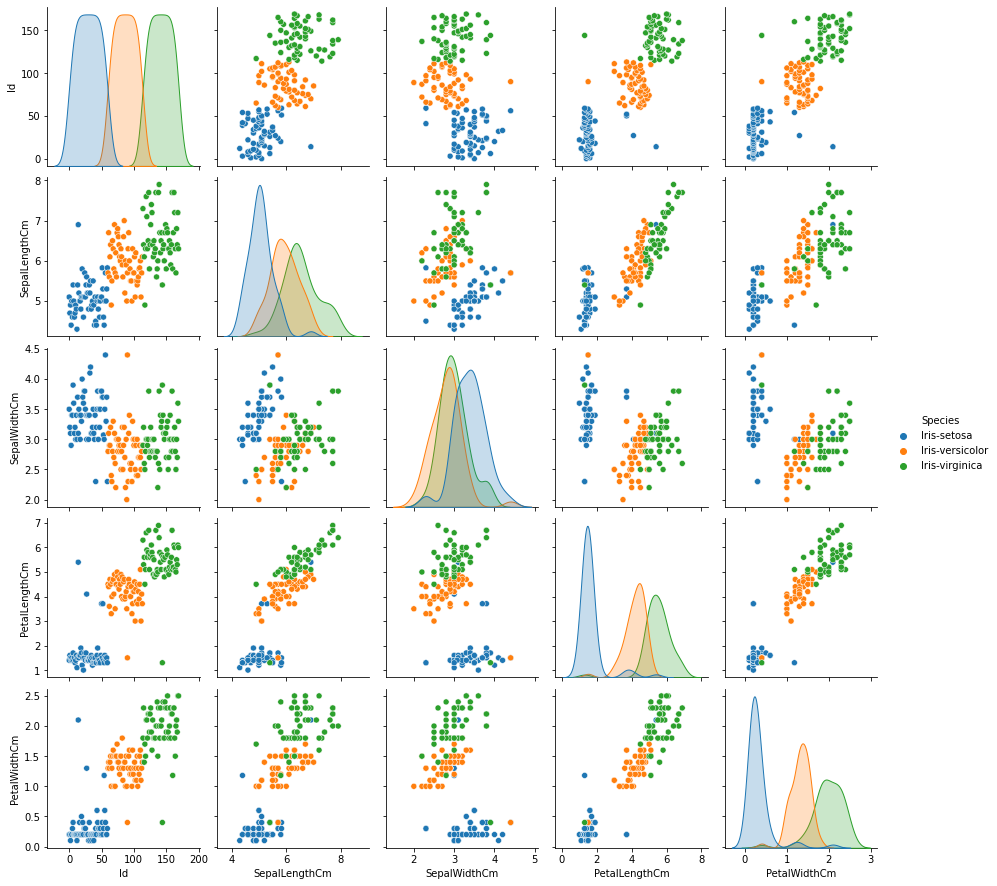

In [13]:
sbn.pairplot(data=data,hue="Species")

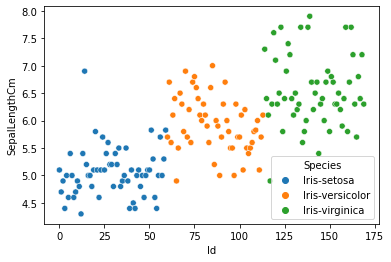

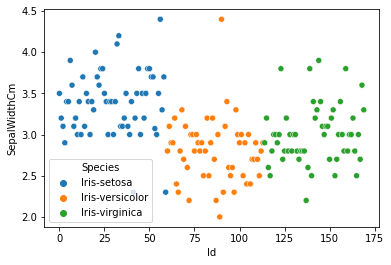

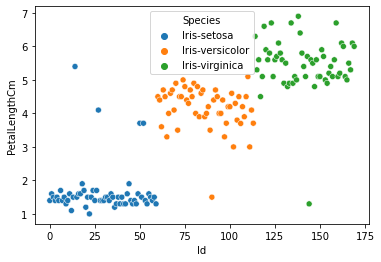

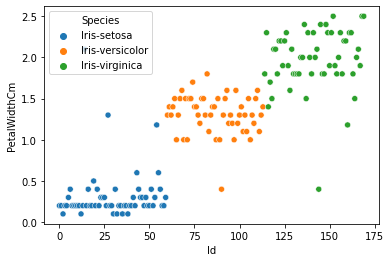

In [14]:
for column in data.columns[1:-1]:
    sbn.scatterplot(data=data,hue="Species",x="Id",y=column)
    plt.show()
## 4 sütun (özellik) için her bir türün dağılımı

### Outlier Detection 

3 standart sapma

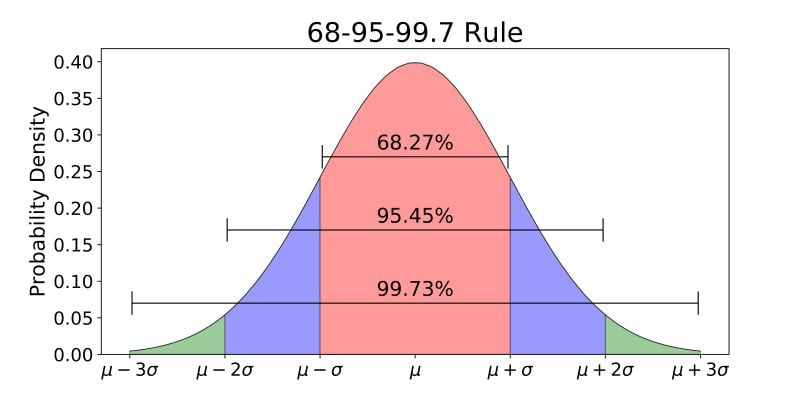

###### Normal dağılımda, en önemli parametreler ortalama (𝜇) ve standart sapma (σ) değerleridir.
- Normal dağılımda:
    - +1σ ve −1𝜎 arasındaki değerler popülasyonun yaklaşık %68.27'sini kapsar. 
    - +2σ ve −2𝜎 arasındaki değerler popülasyonun yaklaşık %95.45'ini kapsar.
    - +3σ ve −3𝜎 arasındaki değerler popülasyonun yaklaşık %99.7'sini kapsar.
- Bu kural, standart sapmanın küçük ya da büyük olmasından bağımsız olarak her zaman bu şekilde dağılır. ±4𝜎 ve sonrasında toplam popülasyonun çok az bir kısmı bulunduğu için daha sonrasındaki alanlar genellikle dikkate alınmaz.

In [15]:
for column in data.columns[1:-1]:
    for spec in data["Species"].unique():
        selected_spec = data[data["Species"] == spec]
        selected_column = selected_spec[column]
        
        std = selected_column.std()
        avg = selected_column.mean()
        
        three_sigma_plus = avg + (3 * std)
        three_sigma_minus = avg - (3 * std)
        
        outliers = selected_column[((selected_spec[column] > three_sigma_plus) | (selected_spec[column] < three_sigma_minus))].index
        print(outliers)
        data.drop(index = outliers, inplace=True)

Int64Index([14], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([90], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([27, 50, 52], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([144], dtype='int64')
Int64Index([54], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


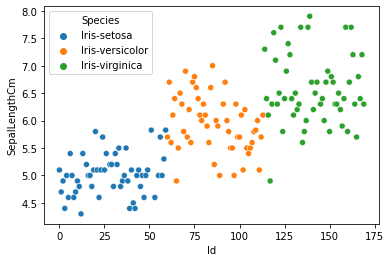

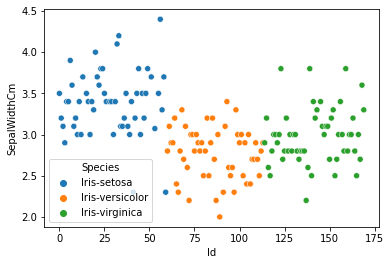

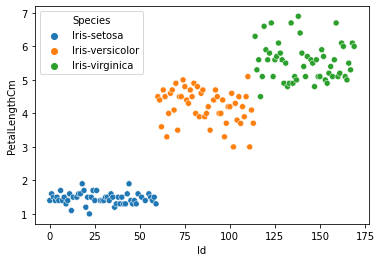

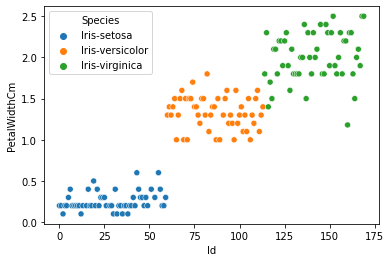

In [16]:
for column in data.columns[1:-1]:
    sbn.scatterplot(data=data,hue="Species",x="Id",y=column)
    plt.show()
    
## 4 sütun (özellik) için her bir türün dağılımı

### IQR - Quantile

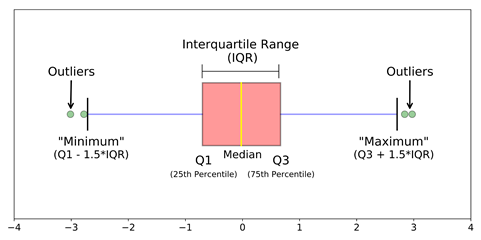

###### IQR, verilerin ortadaki %50'sini temsil eden bir yayılım ölçüsüdür. Veri seti çeyrek dilimlere ayrılır:
- Q1 (Birinci Çeyrek): Verilerin %25'inin altındaki değeri temsil eder.
- Q3 (Üçüncü Çeyrek): Verilerin %75'inin altındaki değeri temsil eder.
- IQR: Q3 ile Q1 arasındaki farktır ve veri setinin orta %50'sinin genişliğini gösterir.

###### Formül : 
    - IQR, Q3-Q1 olarak hesaplanır.
- Aykırı değerler, genellikle şu formülle belirlenir:
    - Alt Sınır: Q1 - 1.5 \times IQR
    - Üst Sınır: Q3 + 1.5 \times IQR
- Bu sınırların dışında kalan değerler aykırı olarak kabul edilir.

In [17]:
for column in data.columns[1:-1]:
    for spec in data["Species"].unique():
        selected_spec = data[data["Species"] == spec]
        selected_column = selected_spec[column]
        
        q1 = selected_column.quantile(0.25)
        q3 = selected_column.quantile(0.75)
        
        iqr = q3 - q1
        
        minimum = q1 - (1.5 * iqr)
        maximum = q3 + (1.5 * iqr)
        
        max_index = data[(data["Species"] == spec) & (data[column] > maximum)].index
        min_index = data[(data["Species"] == spec) & (data[column] < minimum)].index
        
        data.drop(index = max_index,inplace=True)
        data.drop(index = min_index,inplace=True)

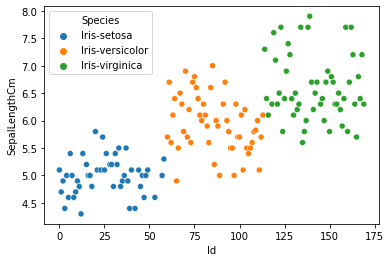

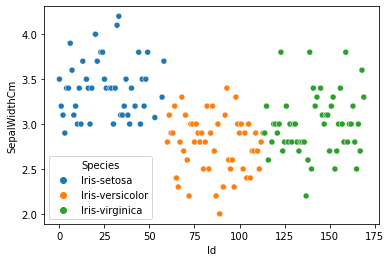

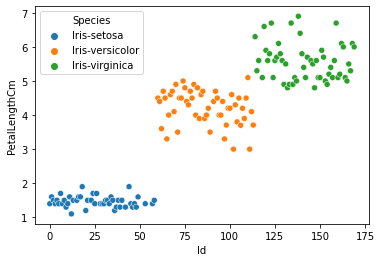

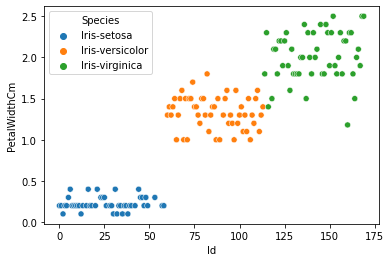

In [18]:
for column in data.columns[1:-1]:
    sbn.scatterplot(data=data,hue="Species",x="Id",y=column)
    plt.show()
## 4 sütun (özellik) için her bir türün dağılımı

In [19]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,5.0,3.4,1.5,0.2,Iris-setosa
...,...,...,...,...,...,...
165,165,5.7,2.5,5.0,2.0,Iris-virginica
166,166,6.8,3.0,5.5,2.1,Iris-virginica
167,167,6.4,2.7,5.3,1.9,Iris-virginica
168,168,7.2,3.6,6.1,2.5,Iris-virginica


#### Label Encoding

- Label Encoding -> her bir kategoriyi sayisal bir etiketle temsil eder.

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()
data["Species"] = le.fit_transform(data["Species"])

In [22]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,5.1,3.5,1.4,0.2,0
1,1,4.7,3.2,1.6,0.2,0
2,2,4.9,3.1,1.5,0.1,0
3,3,4.4,2.9,1.4,0.2,0
4,4,5.0,3.4,1.5,0.2,0


#### Veriyi eğitim / test olarak ayırma 

In [23]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int32
dtype: object

In [24]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [25]:
data.drop(["Id"],axis=1,inplace=True)

In [26]:
from sklearn.model_selection import train_test_split
## eğitimden önceki ayırma işlemi

In [27]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,stratify=data.iloc[:, -1])

# stratify -> Sınıf dengesizliğini gidermek için kullanıldı. Hangi sınıftan kaç tane varsa ona göre train/test olarak ayrıldı.

In [28]:
y_test.value_counts()

2    17
1    16
0    14
Name: Species, dtype: int64

In [29]:
y_train.value_counts()

1    37
2    37
0    33
Name: Species, dtype: int64

#### Modelin oluşuturulması

In [30]:
import xgboost as xgb

In [31]:
xgb_cls = xgb.XGBClassifier(objective="multiclass:softmax",num_class = 3) ## 3 sınıf old. için num_class = 3

In [32]:
xgb_cls.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [33]:
preds = xgb_cls.predict(x_test)

In [34]:
preds

array([1, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 2, 2, 2, 1, 2,
       0, 2, 1], dtype=int64)

In [35]:
np.array(y_test)

array([1, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2, 2, 0, 0, 1,
       1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 2,
       0, 2, 1])

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [37]:
print("accuracy score : ")
accuracy_score(y_test,preds)

accuracy score : 


0.9574468085106383

In [38]:
confusion_matrix(y_test,preds)

array([[14,  0,  0],
       [ 0, 14,  2],
       [ 0,  0, 17]], dtype=int64)

## Veri artırımı - SMOTE 

In [39]:
data_smote

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.7,3.2,1.6,0.2,0
2,4.9,3.1,1.5,0.1,0
3,4.4,2.9,1.4,0.2,0
4,5.0,3.4,1.5,0.2,0
...,...,...,...,...,...
165,5.7,2.5,5.0,2.0,2
166,6.8,3.0,5.5,2.1,2
167,6.4,2.7,5.3,1.9,2
168,7.2,3.6,6.1,2.5,2


In [40]:
data_smote.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [41]:
data_smote.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int32
dtype: object

In [52]:
X = data_smote.iloc[:, :-1]
Y = data_smote.iloc[:, -1]
x_trains, x_tests, y_trains, y_tests = train_test_split(X,Y,test_size=0.3)

In [53]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(x_trains)
X_test_scale = scaler.transform(x_tests)

In [54]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

In [55]:
## sınıfları 100'er örnek ile artırdık.
sample_size = {0: 100, 1: 100, 2: 100}   
sm = SMOTE(sampling_strategy=sample_size,random_state=42)
X_over_sampled, y_over_sampled = sm.fit_resample(X_train_scale, y_trains)


- resample --->  SMOTE, resample işlemi sırasında azınlık sınıfını yeniden örnekler. Bu, veri setindeki azınlık sınıfını artırarak her sınıfın eşit sayıda örneğe sahip olmasını sağlar. SMOTE, mevcut örneklerin bir kombinasyonunu oluşturarak yeni veriler üretir, bu sayede orijinal veri setindeki örneklerin aynısı değil, türetilmiş yeni örnekler oluşturulur.

### XGBOOST

In [56]:
xgb_cls = xgb.XGBClassifier(objective="multiclass:softmax",num_class = 3)

In [57]:
xgb_cls.fit(X_over_sampled, y_over_sampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [58]:
preds = xgb_cls.predict(X_test_scale)
accuracy_score(y_tests,preds)

0.9787234042553191

## Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
lr = LogisticRegression().fit(X_over_sampled, y_over_sampled)

predsL = lr.predict(X_test_scale)
accuracy_score(y_tests, predsL)

0.9574468085106383

    - SMOTE veri artırımı bu örnekte tamamen pratik olması amacıyla yapılmıştır. Bu teknik sınıf dengesizliği olduğu durumlarda kullanılmalıdır. Aksi takdirde modelin performansını olumsuz etkileyebilir.

###### Xgboost algoritması ile oluşturulan tahminlerin doğruluk skorları, veri artırımı ile olumlu yönde etkilenmiştir. Fakat iris datasetinde sınıf dengesizliği olmadığı için net olarak olumlu etkilenmiştir diyemeyiz.
